In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly
)
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D

In [5]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

# accHamiltoniansAndMatrices: intro to symbolic calculations

**M. Arlandoo, J. Frank, T. Mertens**

# Overview

- defining generic functions
- Poisson Brackets
- Lie Operators

# Symbolic Calculations

The package has the goal to allow basic calculations with Lie maps, where the most commonly used Hamiltonians in accelerator physcis are implemented symbolically using Sympy. The pacakage has other modules for which we refer to the other example notebooks.

**Side note on displaying of expressions:**

The package still fails to print the first two arguments without the variables when displaying the Hamiltonian. The underlying cause is that these arguments are not custom defined, like the PoissonBracket, but native sympy objects. Due to this the lowest end of the recursive printing depends on the native implementation for these objects. I did not implement an overloading of these methods yet.

# Defining generic Functions

We start by defining some generic functions where for simplicty we use only $x$ and $px$ as independent variables.

In [6]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

# Poisson Brackets

## Primitive brackets

In [8]:
pbab = PoissonBracket(A,B)
pbab

In [9]:
# no independent variables are defined
pbab.doit()

Nothing to evaluate - missing coordinates and momenta!


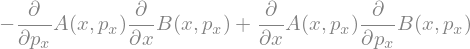

In [12]:
pbab = PoissonBracket(A,B,coords=[x],mom=[px])
pbab.doit()

In [13]:
pbab = PoissonBracket(A,B,coords=[y],mom=[px])
pbab.doit()

## Primitive brackets - expand

In [14]:
pbapbc = PoissonBracket(A+B,C, coords=[x],mom=[px])
pbapbc

In [18]:
pbapbc.expand(commutator=True)

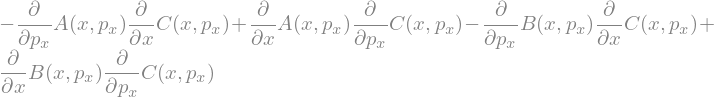

In [17]:
pbapbc.expand(commutator=True).doit()

In [21]:
# printing issue - needs to be updated
pbatbc = PoissonBracket(A*B,C, coords=[x],mom=[px])
pbatbc

In [22]:
# notice the order - these are operators ORDER MATTERS!!!!
pbatbc.expand(commutator=True)

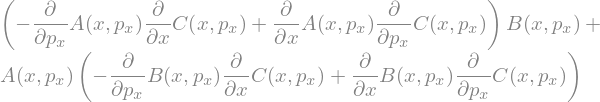

In [23]:
pbatbc.expand(commutator=True).doit()

## Double brackets

In [24]:
pbabc = PoissonBracket(A,PoissonBracket(B,C))
pbabc

In [27]:
# independent coordinates and momenta of outmost bracket are enforced
pbabc = PoissonBracket(A,PoissonBracket(B,C,coords=[x],mom=[px]),coords=[y],mom=[py])
pbabc.doit()

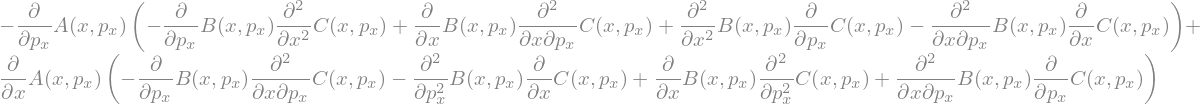

In [29]:
pbabc = PoissonBracket(A,PoissonBracket(B,C,coords=[x],mom=[px]),coords=[x],mom=[px])
pbabc.doit()

# Lie Operators

## Defining Lie Operators

Using the above defined generic functions we can now define the Lie Operators.

In [30]:
Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)

In [31]:
Aop

## Basics

Lie operators can be combined, i.e.:
$$e^{:A:}e^{:B:}$$
using the **BCH** method, which is implemented **up to fourth order**.

In [32]:
Aop.BCH(Bop,1)

In [33]:
Aop.BCH(Bop,2)

In [34]:
Aop.BCH(Bop,3)

In [35]:
Aop.BCH(Bop,4)

## Hamiltonians

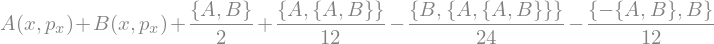

In [36]:
# extracting the Hamiltonian
Aop.BCH(Bop,4).ham

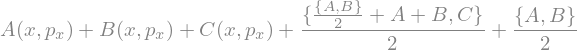

In [37]:
H1 = Aop.BCH(Bop,2).BCH(Cop,2).ham
H1

Let us clean this up a bit by expanding the Poisson Brackets.

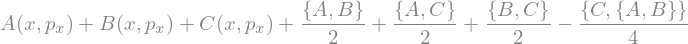

In [38]:
Aop.BCH(Bop,2).BCH(Cop,2).ham.expand(commutator=True)